In [1]:
%matplotlib inline
from __future__ import division

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
visitors = pd.read_csv('../data/aim_full_7_18_17/visitors.zip')
visitors.columns = [x.strip() for x in visitors.columns]

events = pd.read_csv('../data/aim_full_7_18_17/web_events_q1_2017.csv', parse_dates=['timestamp'])
events = events.append(pd.read_csv('../data/aim_full_7_18_17/web_events_q2_2017.csv', parse_dates=['timestamp']))

devices = pd.read_csv('../data/aim_full_7_18_17/machine_fingerprints.csv')

/usr/local/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (4,5,6,7,10,11,12,13,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
visitors.head()

,dg_id,identity_type,professional_designation,npi_number,primary_specialty,primary_specialty_group,secondary_specialty,secondary_specialty_group,first_name,last_name,formatted_name,city,state,zipcode,birth_year,grad_year,grad_school,gender
0,0000000000,POI,POI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN
1,0000004644,POI,POI,NaN,NaN,NaN,NaN,NaN,R,Curtiss,NaN,NaN,MI,NaN,0,1957,NaN,NaN
2,0000006576,POI,POI,NaN,NaN,NaN,NaN,NaN,William,Fish,NaN,NaN,IN,NaN,0,1956,NaN,NaN
3,0000014225,POI,POI,NaN,NaN,NaN,NaN,NaN,John,Miller,NaN,NaN,MI,NaN,0,1950,NaN,NaN
4,0000018208,POI,POI,NaN,NaN,NaN,NaN,NaN,Albert,Schartel,NaN,NaN,PA,NaN,0,1954,NaN,NaN


In [4]:
visitors.columns = [x.strip() for x in visitors.columns]

In [5]:
vnulls = visitors.groupby('professional_designation').count().reset_index()

In [6]:
for col in [x for x in vnulls.columns if x not in ['dg_id', 'identity_type', 'professional_designation']]:
    vnulls[col+'_pct'] = vnulls.apply(lambda x: x[col]/x.dg_id,axis=1)

In [7]:
vnulls[['professional_designation', 'dg_id']+[x for x in vnulls.columns if '_pct' in x]]

,professional_designation,dg_id,npi_number_pct,primary_specialty_pct,primary_specialty_group_pct,secondary_specialty_pct,secondary_specialty_group_pct,first_name_pct,last_name_pct,formatted_name_pct,city_pct,state_pct,zipcode_pct,birth_year_pct,grad_year_pct,grad_school_pct,gender_pct
0,Dentist,246727,0.000000,0.731606,0.731606,0.000000,0.000000,0.999984,0.999951,1.000000,0.999996,1.000000,1.000000,1.0,1.0,0.911116,0.981396
1,NP,238053,0.837910,0.997858,0.997858,0.000000,0.000000,0.999966,0.999941,0.999937,0.999840,0.999971,0.999966,1.0,1.0,0.000000,0.973308
2,Nurse,683356,0.054721,0.072065,0.072065,0.000000,0.000000,0.999854,0.882380,0.073657,0.072292,0.073688,0.073719,1.0,1.0,0.000000,0.071370
3,PA,120084,0.899637,0.998093,0.998093,0.000000,0.000000,0.999992,0.999958,1.000000,1.000000,1.000000,1.000000,1.0,1.0,0.000000,0.973335
4,POI,3442129,0.001922,0.002589,0.002589,0.002584,0.002584,0.884201,0.874049,0.011087,0.000000,0.072162,0.031782,1.0,1.0,0.000000,0.000000
5,Physician,1234312,0.836616,0.994216,0.994216,0.979115,0.979115,0.999982,0.999978,0.999872,0.999849,0.999987,0.999989,1.0,1.0,0.978959,0.998935


In [8]:
visitors.identity_type.value_counts()

POI    3985003
AUT    1979658
Name: identity_type, dtype: int64

In [9]:
visitors.professional_designation.value_counts()

POI          3442129
Physician    1234312
Nurse         683356
Dentist       246727
NP            238053
PA            120084
Name: professional_designation, dtype: int64

In [11]:
visitors[visitors.professional_designation=='Physician'].primary_specialty.value_counts()[:10]

Internal Medicine (IM)           160286
Family Medicine (FM)             126871
Pediatrics (PD)                   79549
Unspecified (US)                  57334
Anesthesiology (AN)               57121
Obstetrics & Gynecology (OBG)     54676
Psychiatry (P)                    52983
Emergency Medicine (EM)           52700
General Surgery (GS)              43406
Diagnostic Radiology (DR)         34493
Name: primary_specialty, dtype: int64

In [12]:
visitors[visitors.professional_designation=='NP'].primary_specialty.value_counts()[:10]

Family Medicine            75688
Unspecified                36503
Pediatrics                 18015
Adult Medicine             17301
Anesthesiology             15383
Psychiatry                  9971
Obstetrics & Gynecology     9878
Women's Health              6971
Critical Care Medicine      5548
Geriatric Medicine          4723
Name: primary_specialty, dtype: int64

In [13]:
visitors[visitors.professional_designation=='PA'].primary_specialty.value_counts()[:10]

Unspecified               43369
Family Medicine           20783
Emergency Medicine         8334
Orthopedic Surgery         5998
General Surgery            4538
Pediatrics                 3710
Internal Medicine          3220
Cardiovascular Disease     2354
Dermatology                2254
Anesthesiology             2152
Name: primary_specialty, dtype: int64

In [14]:
events.head()

,dg_id,machine_fingerprint,session_id,host,url,title,timestamp,js_page_cnt,referrer,scheme,path,query,fragment
0,194058333,12049290.0,be0c322b-4eb4-49fc-9ed9-9a9ba3617518,www.healthline.com,www.healthline.com/health/urine-culture-clean-...,Clean Catch Urine Sample and Culture,2017-01-13 21:11:54.573,1,http://www.healthline.com/health/urine-culture...,http,/health/urine-culture-clean-catch,NaN,Procedure2
1,194058333,12049290.0,be0c322b-4eb4-49fc-9ed9-9a9ba3617518,www.healthline.com,www.healthline.com/health/urine-culture-clean-...,Clean Catch Urine Sample and Culture,2017-01-13 21:17:04.310,2,http://www.healthline.com/health/urine-culture...,http,/health/urine-culture-clean-catch,NaN,Procedure2
2,194058333,12049290.0,be0c322b-4eb4-49fc-9ed9-9a9ba3617518,www.healthline.com,www.healthline.com/health/urine-culture-clean-...,Clean Catch Urine Sample and Culture,2017-01-13 21:46:47.860,5,http://www.healthline.com/health/urine-culture...,http,/health/urine-culture-clean-catch,NaN,Procedure2
3,194058333,12049290.0,3456a524-e30b-411c-a414-fa4b836e6203,www.healthline.com,www.healthline.com/health/urine-culture-clean-...,Clean Catch Urine Sample and Culture,2017-01-15 11:10:57.000,1,http://www.healthline.com/health/urine-culture...,http,/health/urine-culture-clean-catch,NaN,Procedure2
4,194058333,12049290.0,29dfabb0-f748-4b1b-983d-99ecf4b7c6e8,www.healthline.com,www.healthline.com/health/urine-culture-clean-...,Clean Catch Urine Sample and Culture,2017-01-15 20:00:58.260,1,http://www.healthline.com/health/urine-culture...,http,/health/urine-culture-clean-catch,NaN,Procedure2


In [17]:
events.fragment.value_counts().reset_index()

,index,fragment
0,Overview1,21397
1,Symptoms2,4813
2,Causes2,4804
3,2820,3554
4,Causes3,3142
5,Symptoms3,3133
6,Treatment5,2899
7,current_relocate_search=r&detailed_results=0,2356
8,position_type=20&current_relocate_search=r&det...,2337
9,Treatment6,2276


In [18]:
events.groupby('session_id').size().loc[lambda x: x>1].sort_values(ascending=False)

session_id
c636d87b-00cf-42b3-89b9-f6b10d8529b4    19771
ea5edc50-2f2d-487f-b271-8a459d793827      649
ca771928-c0d5-4b25-89fe-cb047d2863e5      573
6f8d6f15-54dd-489e-96bd-332496d569d3      558
e3d62424-c903-41b9-a156-fd9516fd0590      537
50a81d21-a843-473a-b015-139ce2630a08      391
d1f7abbb-ad57-402a-8752-1f324cab97c2      388
82261106-9e57-4abb-b348-691350613b84      349
5fe1283a-cd06-4496-9196-3099bcb7eaa1      348
80bd6eb0-9cda-429f-a79d-367cfec1acc8      301
fc0bea61-26df-4631-85cd-5c46d5c51720      299
59eedc09-f071-43c5-814f-e4ff3ecd96d7      295
0c17bbdd-41cb-4635-82bc-89589eba44a7      291
682864ae-60ed-485b-bb92-2a2e95971884      282
5d6ce5a0-bcb9-499d-a1dd-a99d38cfbac8      281
e5355135-5186-496d-a5d9-b03fb18466da      274
fe1c0ac4-3c2e-4bac-9689-3bdfa9133fb7      272
8c7e7448-2720-46bc-84b0-540872dc940c      269
d8b3e58d-c788-4134-a76a-38760e6a05b2      266
3ebdf406-ef28-40f3-a555-fb08c859c9aa      264
e1e42165-fe3b-441c-bbfd-e80312a10776      260
408bf0f1-436d-4580-bdb2

let's look @ high-volume sessions

In [21]:
session_cnts = events.groupby('dg_id').session_id.nunique().sort_values(ascending=False).reset_index()
session_cnts.columns = ['dg_id', 'sessions']

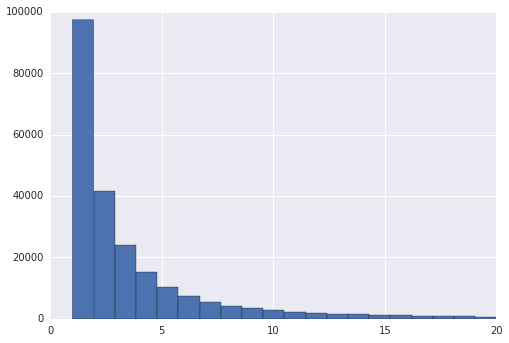

In [22]:
session_cnts[session_cnts.sessions<=20].sessions.hist(bins=20)

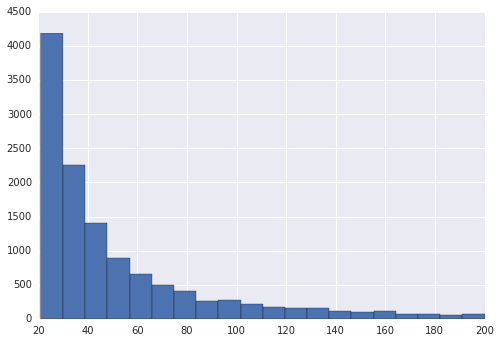

In [23]:
session_cnts[(session_cnts.sessions>20)&(session_cnts.sessions<=200)].sessions.hist(bins=20)

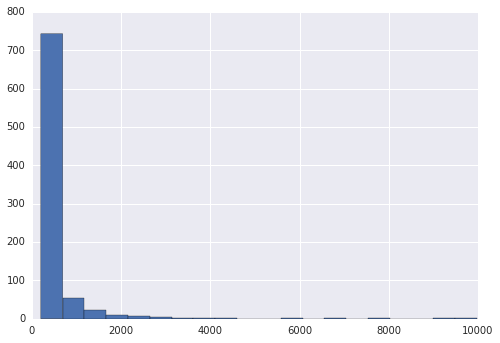

In [24]:
session_cnts[(session_cnts.sessions>200)].sessions.hist(bins=20)

### Should we also filter dg_ids with tons of distinct sessions? or is that ok idk

In [25]:
events['hour'] = events.timestamp.apply(lambda x: x.hour)
events['dow'] = events.timestamp.apply(lambda x: x.dayofweek)

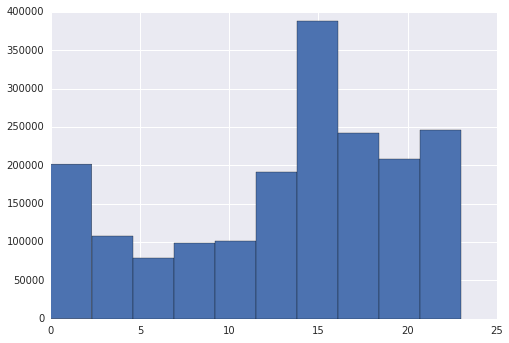

In [26]:
events.drop_duplicates(subset=['hour', 'session_id']).hour.hist()

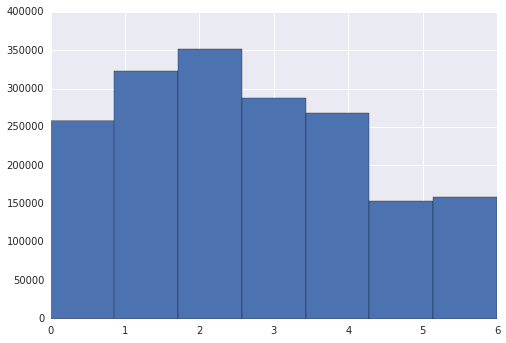

In [27]:
events.drop_duplicates(subset=['dow', 'session_id']).dow.hist(bins=7)

very few visitors have web events, let's dig in

In [28]:
dgids = set(events.dg_id)

In [29]:
visitors['has_event'] = visitors.dg_id.apply(lambda x: 1 if x in dgids else 0)

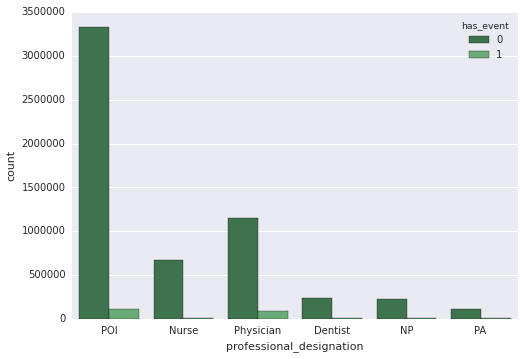

In [30]:
sns.countplot(x="professional_designation", hue="has_event", data=visitors, palette="Greens_d");

In [31]:
with_events = visitors.groupby('professional_designation').has_event.agg(['sum', 'count'])

In [32]:
with_events['pct'] = with_events.apply(lambda x: x['sum']/x['count'], axis=1)

In [34]:
with_events

,sum,count,pct
professional_designation,,,
Dentist,6871,246727,0.027849
NP,14172,238053,0.059533
Nurse,14537,683356,0.021273
PA,7056,120084,0.058759
POI,111623,3442129,0.032428
Physician,84664,1234312,0.068592


In [36]:
yrs_w_events = visitors.groupby('grad_year').has_event.agg(['sum', 'count']).reset_index()
yrs_w_events['pct'] = yrs_w_events.apply(lambda x: x['sum']/x['count'], axis=1)

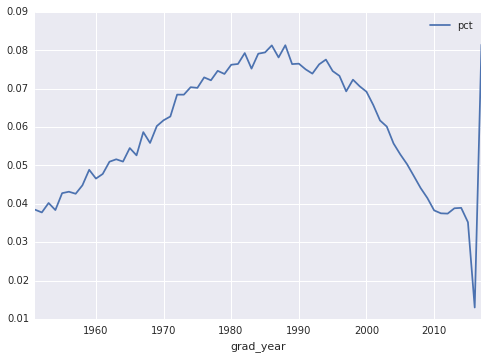

In [37]:
yrs_w_events[yrs_w_events.grad_year>1950].plot(x='grad_year', y='pct')

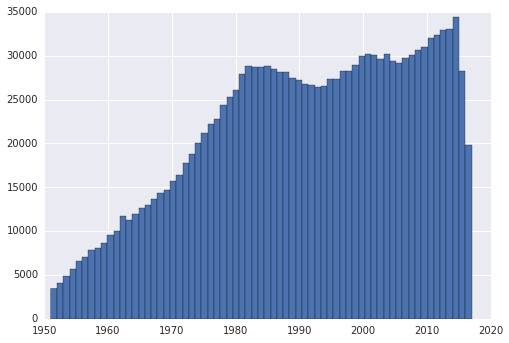

In [38]:
visitors[visitors.grad_year>1950].grad_year.hist(bins=67)